<style>
    pre {
        white-space: pre-wrap;
        word-wrap: break-word;
    }
</style>

<div style="display:flex; justify-content:space-around; align-items:center; background-color:#cccccc; padding:5px; border:2px solid #333333;">
    <a href="https://estudios.upct.es/grado/5251/inicio" target="_blank">
    <img src="https://www.upct.es/contenido/universidad/galeria/identidad-2021/logos/logos-upct/marca-upct/marca-principal/horizontal/azul.png" alt="UPCT" style="height:145px; width:auto;">
    <a href="https://www.um.es/web/estudios/grados/ciencia-ingenieria-datos/" target="_blank">
    <img src="https://www.um.es/documents/1073494/42130150/LogosimboloUMU-positivo.png" alt="UMU" style="height:200px; width:auto;">
</div>

# Asignatura: **Deep Learning**

## Titulación: **Grado en Ciencia e Ingeniería de Datos**

## Práctica 1: Introducción al Deep Learning
### **Sesión 3/3: Redes neuronales preentrenadas**

**Autores**: Juan Morales Sánchez, Antonio Martínez Sánchez, José Luís Sancho Gómez y Juan Antonio Botía Blaya

___

### Objetivos

   - Familiarizarse con el *Transfer Learning*
   - Emplear redes neuronales preentrenadas en la práctica
   - Comparar distintos enfoques de reentrenamiento
   - Evaluar la eficacia y el coste computacional de las diferentes estrategias

### Contenidos
- [Aprendizaje por transferencia](#transferencia)
- [Red preentrenada como extractor de características](#extractor)
- [Ajuste fino de una red preentrenada (*Fine-Tuning*)](#fino)
- [Entrenamiento desde cero de un modelo profundo](#cero)
- [Ejercicios](#ejercicios)

### Bibliografía
- [Deep Learning with Python (segunda edición)](https://www.manning.com/books/deep-learning-with-python-second-edition)
- [Dive into Deep Learning](https://d2l.ai/)

### Requisitos
<a class='anchor' id='requisitos'></a>

Se trabajará con notebooks de [Jupyter](https://jupyter.org/install) con código Python empleando como intérprete la última versión de [Miniconda](https://docs.anaconda.com/miniconda/). Se requiere la preinstalación (se recomienda utilizar [pip](https://pypi.org/project/pip/)) de los siguientes paquetes de Python:

- [Numpy](https://pypi.org/project/numpy/) (computación numérica)
- [Scipy](https://pypi.org/project/scipy/) (computación científica)
- [Scikit-learn](https://pypi.org/project/scikit-learn/) (*Machine Learning*)
- [Scikit-image](https://pypi.org/project/scikit-image/) (*Image Processing*)
- [Matplotlib](https://pypi.org/project/matplotlib/) y [Seaborn](https://pypi.org/project/seaborn/) (visualización de datos)
- [Tensorflow](https://www.tensorflow.org/) 2.x que incluye a [Keras](https://www.tensorflow.org/guide/keras) 2.x (*Deep Learning*)

<div style="page-break-before: always;"></div>

<a class='anchor' id='transferencia'></a>

## Aprendizaje por transferencia

El aprendizaje por transferencia (*Transfer Learning*) es una técnica en el aprendizaje automático que reutiliza un modelo previamente entrenado en un conjunto de datos grande para resolver un problema relacionado pero diferente. Esta técnica es especialmente útil cuando no se dispone de suficientes datos o recursos para entrenar un modelo desde cero.

En el aprendizaje por transferencia, el conocimiento adquirido por un modelo al resolver una tarea (por ejemplo, clasificar imágenes en el conjunto ImageNet) se transfiere para abordar un nuevo problema. Esto se logra reutilizando las características aprendidas por las capas del modelo preentrenado y ajustando algunas partes (o todas) del modelo para adaptarse a la nueva tarea.

Utilizar una red preentrenada permite ahorrar tiempo y recursos computacionales al aprovechar el conocimiento previamente adquirido por estos modelos, que ya han sido entrenados en grandes conjuntos de datos (como ImageNet para visión por computador o modelos de lenguaje como GPT).

Existen 3 formas básicas de implementar el aprendizaje por transferencia para aprovechar una red preentrenada:

- Uso directo (sin modificaciones): La red preentrenada se usa "tal cual" para resolver tareas similares al conjunto de datos original sin necesidad de reentrenar. Se utiliza el modelo completo con su capa de salida original. Solo se hacen predicciones directamente con nuevos datos. Se trata de una situación poco habitual, que ocurre cuando el conjunto de datos de test es similar al conjunto de datos de entrenamiento del modelo original.

- Extracción de características: En este enfoque, la red preentrenada actúa como un extractor de características. Se utiliza la red preentrenada para procesar datos de entrada y obtener representaciones abstractas, que luego se utilizan como entrada para otro modelo más sencillo que concluye con la tarea objetivo.

- Ajuste fino (*Fine-Tuning*): Este enfoque consiste en reutilizar una red preentrenada y ajustar los pesos de algunas o todas las capas mediante un nuevo proceso de entrenamiento para sesgar el aprendizaje hacia nuestro conjunto de datos.

Veamos a continuación de forma práctica cómo aprovechar el *Transfer Learning* y los modelos preentrenados para mejorar la eficiencia del entrenamiento y la generalización del modelo. Para ello en primer lugar cargaremos el conjunto de datos [piedra-papel-tijeras](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors), que se utiliza para probar clasificadores:

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Descargar el conjunto de entrenamiento del dataset rock-paper-scissors

# Ruta base donde están las imágenes
base_dir = "../data/rps"

# Definir clases (nombres de carpetas)
class_names = ['rock', 'paper', 'scissors']

# Inicializar listas para imágenes y etiquetas
images = []
labels = []

# Cargar imágenes desde cada carpeta de clase
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)  # Ruta de la clase
    for img_file in os.listdir(class_dir):  # Iterar sobre las imágenes de la clase
        img_path = os.path.join(class_dir, img_file)
        img = load_img(img_path, target_size=(96, 96))   # Redimensionar imágenes
        img_array = img_to_array(img) / 127.5 - 1.0      # Normalizar a [-1, 1]
        
        images.append(img_array)
        labels.append(label)

# Convertir listas a NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Verificar dimensiones de datos cargados
print(f"Imágenes cargadas: {images.shape}, Etiquetas: {labels.shape}")

x_train, y_train = images, labels


Imágenes cargadas: (2520, 96, 96, 3), Etiquetas: (2520,)


In [13]:
# Descargar el conjunto de test del dataset rock-paper-scissors
# Ruta base donde están las imágenes
base_dir = "../data/rps-test-set"

# Definir clases (nombres de carpetas)
class_names = ['rock', 'paper', 'scissors']

# Inicializar listas para imágenes y etiquetas
images = []
labels = []

# Cargar imágenes desde cada carpeta de clase
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)  # Ruta de la clase
    for img_file in os.listdir(class_dir):  # Iterar sobre las imágenes de la clase
        img_path = os.path.join(class_dir, img_file)
        img = load_img(img_path, target_size=(96, 96))   # Redimensionar imágenes
        img_array = img_to_array(img) / 127.5 - 1.0      # Normalizar a [-1, 1]
        
        images.append(img_array)
        labels.append(label)

# Convertir listas a NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Verificar dimensiones de datos cargados
print(f"Imágenes cargadas: {images.shape}, Etiquetas: {labels.shape}")

x_test, y_test = images, labels


Imágenes cargadas: (372, 96, 96, 3), Etiquetas: (372,)


<a class='anchor' id='extractor'></a>

## Red preentrenada como extractor de características

Este enfoque resulta útil cuando el **conjunto de datos disponible es pequeño o diferente** del conjunto de datos original de entrenamiento. Para aplicarlo se eliminan las capas finales del modelo (por ejemplo, la capa original de clasificación), y se conservan congeladas las capas restantes, generarán características representativas de los datos de entrada. Estas características alimentan la entrada de un nuevo clasificador/regresor final, cuyo entrenamiento se encarga de concluir la tarea.

En este ejemplo emplearemos la red [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small) (versión minimalista), que ha sido preentenada con el conjunto de datos [ImageNet](https://image-net.org/download.php).

Habitualmente se emplean capas (de menor a mayor complejidad) ``GlobalAveragePooling2D``, ``Flatten`` o ``Dense`` como conexión entre ambos modelos, dependiendo de la cantidad de datos disponibles y de la complejidad del modelo deseado.

Observe que en este ejemplo de clasificación sobre un conjunto de datos sencillo como el [piedra-papel-tijeras](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors) se alcanza fácilmente una buena clasificación.

c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


2128592/2128592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 3, 3, 576)      │       441,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,243 (1.97 MB)

 Trainable params: 74,243 (290.01 KB)

 Non-trainable params: 441,000 (1.68 MB)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8046 - loss: 0.6499 - val_accuracy: 0.9841 - val_loss: 0.1344
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9989 - loss: 0.0098 - val_accuracy: 0.9524 - val_loss: 0.1685
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9683 - val_loss: 0.1085
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9643 - val_loss: 0.1106
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9603 - val_loss: 0.1076
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8808 - loss: 0.4818
Precisión en datos de validación: 0.81
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8808 - loss: 0.4818
Pérdida: 0.7340483069419861, Exactitud: 0.8091397881507874
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


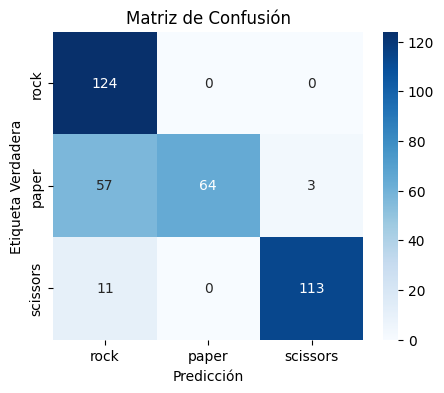

              precision    recall  f1-score   support

        rock       0.65      1.00      0.78       124
       paper       1.00      0.52      0.68       124
    scissors       0.97      0.91      0.94       124

    accuracy                           0.81       372
   macro avg       0.87      0.81      0.80       372
weighted avg       0.87      0.81      0.80       372



In [ ]:
# Ejemplo de uso de red preentrenada como extractor de características para construir un clasificador

from tensorflow.keras import Sequential
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
tf.keras.utils.set_random_seed(2025)  # experimentos reproducibles: fija semilla para python base, numpy and tf

# Cargar el modelo preentrenado sin la capa superior
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(96, 96, 3), include_preprocessing=False, minimalistic=True)

# Congelar las capas del modelo base, solo se entrenarán las capas superiores que añadamos
base_model.trainable = False

# Añadir capas superiores personalizadas
model = Sequential([
    base_model, # Modelo base preentrenado de MobileNetV3Small
    GlobalAveragePooling2D(),       # Capa de pooling global de media para reducir dimensiones
    Dense(128, activation='relu'),  # Capa Fully Connected de 128 neuronas
    Dense(3, activation='softmax')  # 3 clases: Rock, Paper, Scissors -> Capa de salida con activación Softmax para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    # validation_data=(x_test, y_test),
    batch_size=32,
    epochs=5
)

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en datos de validación: {accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida: {loss}, Exactitud: {accuracy}")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)
q =model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=class_names))

In [20]:
print(len(base_model.layers))

102


<a class='anchor' id='fino'></a>

## Ajuste fino de una red preentrenada (*Fine-Tuning*)

Se suele optar por esta configuración cuando el **conjunto de datos disponible es moderado o tiene similitudes con el conjunto original** de entrenamiento. En este caso las primeras capas (que aprendieron características genéricas como bordes o texturas) se mantienen congeladas (o con una tasa de aprendizaje muy baja). Las capas superiores (que aprenderán características específicas del nuevo conjunto de datos) se descongelan y se reentrenan con los nuevos datos.

Se puede usar de nuevo la red [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small), preentenada con el conjunto de datos [ImageNet](https://image-net.org/download.php), para implementar el ajuste fino. A pesar de la diferencia conceptual respecto al apartado anterior, la implementación es muy similar.

<a class='anchor' id='cero'></a>

## Entrenamiento desde cero de un modelo profundo

Para comparar las prestaciones, el coste computacional y el tiempo necesario para el entrenamiento, también es posible entrenar desde cero la red [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small), que en este caso se encontrará completamente desentrenada. En este caso el entrenamiento exige aproximadamente 200 épocas como mínimo.

<a class='anchor' id='ejercicios'></a>

## Ejercicios

**E1:** Partiendo del código proporcionado en el apartado previo referido al uso de redes preentrenadas como [extractores de características](#extractor), implemente el [ajuste fino de una red preentrenada](#fino), congelar las primeras 10 capas del modelo [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small) preentrenado con [ImageNet](https://image-net.org/download.php), y permitiendo el reentrenamiento del resto de capas.

1. Cambie el número de capas descongeladas en un rango razonable,y analice su influencia en tiempo y prestaciones. 
2. Repita los experimentos con un modelo un poco más complejo (``minimalistic=False``), y analice su influencia en tiempo y prestaciones.
3. Añada [aumentación de datos](https://www.tensorflow.org/tutorials/images/data_augmentation) en las capas inferiores del modelo, al menos volteado horizontal y rotación aleatoria, y analice su influencia en tiempo y prestaciones.

**E2:** Modifique nuevamente el código de partida con el modelo [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small) para evaluar el [entrenamiento desde cero de un modelo profundo](#cero).

1. Introduzca en los entrenamientos la [parada anticipada](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), para aliviar el tiempo de cómputo necesario.
2. Elabore una tabla que compare cada una de las 3 soluciones (extractor de características, ajuste fino y entrenamiento desde cero), recogiendo el número de parámetros, número de épocas necesarias para el entrenamiento, tiempo de entrenamiento y las prestaciones generales en test.


<!---
**E4:** Partiendo del código proporcionado en el apartado previo referido al modelo [MobileNetV3Small](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small) preentrenado con [ImageNet](https://image-net.org/download.php) como [extractores de características](#extractor), añada un análisis de validación cruzada [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), así como la [parada anticipada](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) durante el entrenamiento de cada uno de los K modelos, para evitar el sobreentrenamiento. Realice experimentos con K = 5, y compare los resultados entre *folds*.
-->
